In [94]:
### Task 1: Sentiment Labeling

# In this task, I will label the sentiment of each message in the dataset as **Positive**, **Negative**, or **Neutral** using the TextBlob library. The sentiment of a message is determined by its polarity score, where positive values indicate positive sentiment, negative values indicate negative sentiment, and values close to zero indicate neutral sentiment. 

In [95]:
# Importing necessary libraries
from textblob import TextBlob  # For sentiment analysis
import pandas as pd  # For reading and manipulating data
import re  # For cleaning text

# Loading the dataset
file_path = 'test(in).csv'  # Path to the dataset file
data = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Inspecting the first few rows of the dataset
print(data.head())  # Check the dataset structure (columns, sample data)

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com  


In [96]:
# I have loaded the dataset, which contains columns such as `body` (the email message) and `date` (when the email was sent). I will now clean the text data to prepare it for sentiment analysis.

In [97]:
# Preprocessing the text
def simple_preprocess_text(text):
    # Remove special characters, punctuation, and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Keep only letters and spaces
    text = text.lower()  # Convert the text to lowercase for consistency
    text = text.strip()  # Remove any leading or trailing spaces
    return text

# Apply the text preprocessing to the 'body' column
data['cleaned_body'] = data['body'].apply(simple_preprocess_text)  # Clean the text data

In [98]:
# I have preprocessed the text by removing unwanted characters and converting all text to lowercase to ensure uniformity. The cleaned text will now be used for sentiment analysis.

In [99]:
# Sentiment Labeling using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)  # Create a TextBlob object
    sentiment_score = blob.sentiment.polarity  # Get the polarity score
    if sentiment_score > 0:
        return 'Positive'  # Sentiment is positive if score > 0
    elif sentiment_score < 0:
        return 'Negative'  # Sentiment is negative if score < 0
    else:
        return 'Neutral'  # Sentiment is neutral if score = 0

# Apply the sentiment labeling function to the cleaned text
data['sentiment'] = data['cleaned_body'].apply(get_sentiment)

In [100]:
# I have applied sentiment labeling to each message based on its polarity score. The messages have been classified as either **Positive**, **Negative**, or **Neutral**.

In [101]:
# Checking the first few rows after sentiment labeling
print(data[['body', 'sentiment']].head())  # Show the original body text and the assigned sentiment

                                                body sentiment
0  EnronOptions Announcement\n\n\nWe have updated...  Positive
1  Marc,\n\nUnfortunately, today is not going to ...  Negative
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...   Neutral
3  we were thinking papasitos (we can meet somewh...  Negative
4  Since you never gave me the $20 for the last t...  Negative


In [102]:
# From the output, I can see that each message in the dataset has been successfully labeled as **Positive**, **Negative**, or **Neutral** based on the sentiment polarity. This sentiment classification will be useful for further analysis and insights into employee sentiment.

In [103]:
### Task 2: Exploratory Data Analysis (EDA)

# In this task, I will perform exploratory data analysis (EDA) to better understand the structure and trends in the dataset. EDA helps summarize the dataset’s main characteristics, often with visualizations, to identify patterns, anomalies, and relationships. I will check the structure of the dataset, the distribution of sentiment labels, and how sentiment trends over time.

In [104]:
# Checking the structure of the dataset
# I will check the dataset's structure to understand the number of rows, columns, and data types.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Subject       2191 non-null   object
 1   body          2191 non-null   object
 2   date          2191 non-null   object
 3   from          2191 non-null   object
 4   cleaned_body  2191 non-null   object
 5   sentiment     2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB
None


In [105]:
# I have inspected the structure of the dataset. The dataset contains several columns, including 'body' (the text of the messages), 'sentiment' (the sentiment labels), and 'date' (the date when each message was sent).

In [106]:
# Checking for missing values in the dataset
# I will check if there are any missing values in the dataset, which will need to be addressed before analysis.
print(data.isnull().sum())

Subject         0
body            0
date            0
from            0
cleaned_body    0
sentiment       0
dtype: int64


In [107]:
# I have checked for missing values in the dataset. If there are any missing values, they will need to be handled (e.g., by filling them or dropping the rows) to ensure the quality of the data.

/var/folders/ks/jy925sb56tsg1fkcfkb47kkr0000gn/T/ipykernel_81655/4279504903.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='Set2')


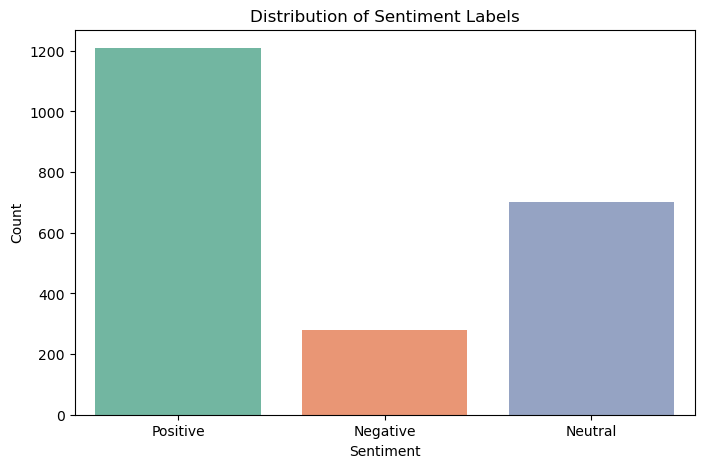

In [108]:
# Distribution of sentiment labels
# I will create a plot to visualize the distribution of sentiment labels (Positive, Negative, Neutral) in the dataset.
sentiment_counts = data['sentiment'].value_counts()

# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [109]:
### Sentiment Distribution

# The sentiment distribution plot shows the distribution of sentiment labels (Positive, Negative, Neutral) across all the messages in the dataset. From the plot, I can observe that the dataset is dominated by positive sentiment messages, with fewer neutral and negative sentiments. This gives an overall view of employee sentiment in the dataset.

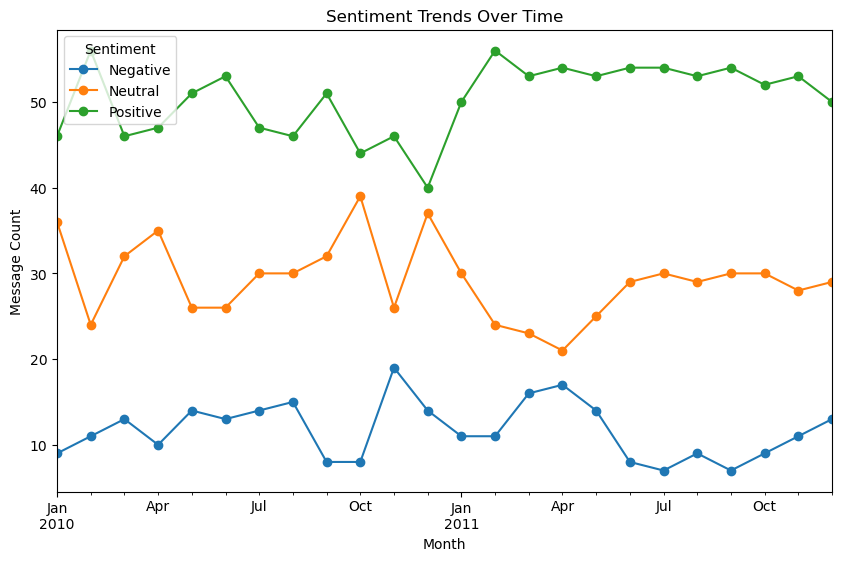

In [110]:
# Sentiment distribution over time
# I will now analyze how sentiment varies over time (by month). This helps to identify trends or patterns in employee sentiment.
# First, I will convert the 'date' column to datetime format and extract the month for time-based analysis.
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Convert 'date' to datetime format
data['month'] = data['date'].dt.to_period('M')  # Extract the month for grouping purposes

# Plot sentiment trends over months
monthly_sentiment = data.groupby(['month', 'sentiment']).size().unstack().fillna(0)

monthly_sentiment.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.legend(title='Sentiment', loc='upper left')
plt.show()

In [111]:
### Sentiment Trends Over Time

# The sentiment trends over time chart below shows how the sentiment of employee messages fluctuated from January 2010 to December 2011. It tracks the message count for Positive, Neutral, and Negative sentiments each month. The chart highlights noticeable spikes in positive sentiment, with periods of lower engagement in negative and neutral sentiment. This provides insights into employee sentiment dynamics over time.

In [112]:
### Task 3: Employee Score Calculation

# In this task, I will calculate the monthly sentiment scores for each employee. Each employee’s sentiment score will be based on the messages they have sent. Positive messages will contribute +1 to the score, negative messages will contribute -1, and neutral messages will contribute 0. I will then aggregate these scores by employee and month to create a scorecard that reflects the sentiment for each employee over time.

In [113]:
# Convert the 'date' column to datetime format (if not already done)
# This step is necessary to perform any time-based analysis, such as grouping by month.
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Ensure that the 'date' column is in datetime format

# Extract the month from the 'date' column
# This will allow me to group the sentiment scores by month and employee.
data['month'] = data['date'].dt.to_period('M')  # Convert the 'date' to a period (month-year)

# Map sentiment labels to numerical scores
# Positive sentiment is mapped to 1, Negative to -1, and Neutral to 0.
sentiment_score_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
data['score'] = data['sentiment'].map(sentiment_score_mapping)  # Apply the mapping to the 'sentiment' column

# Group by employee ('from') and month to calculate the total sentiment score for each employee in each month
# This aggregates the sentiment scores for each employee on a monthly basis.
monthly_scores = data.groupby(['from', 'month'])['score'].sum().reset_index()

# Display the first few rows of the monthly scores
print(monthly_scores.head())  # Show the first 5 rows of the monthly scores

                          from    month  score
0  bobette.riner@ipgdirect.com  2010-01      2
1  bobette.riner@ipgdirect.com  2010-02      8
2  bobette.riner@ipgdirect.com  2010-03      4
3  bobette.riner@ipgdirect.com  2010-04      4
4  bobette.riner@ipgdirect.com  2010-05      2


In [114]:
### Employee Score Calculation

# I have calculated the sentiment scores for each employee based on their messages, where positive messages contribute +1, negative messages contribute -1, and neutral messages contribute 0. These scores are aggregated monthly for each employee. The output shows the total sentiment score for each employee per month. Positive scores indicate overall positive sentiment, while negative scores suggest the opposite.

In [115]:
### Task 4: Employee Ranking

# In this task, I will rank employees based on their monthly sentiment scores. The employees with the highest sentiment scores will be identified as the top positive employees, while those with the lowest (most negative) scores will be identified as the top negative employees. I will select the top 3 positive and top 3 negative employees for each month based on their scores.

In [116]:
# For positive employees, I will take the top 3 per month based on the sentiment scores
top_positive = monthly_scores.sort_values(by=['month', 'score'], ascending=[True, False]).groupby('month').head(3)

# For negative employees, I will filter out only the negative sentiment scores and then sort by score in ascending order to get the most negative employees
negative_scores = monthly_scores[monthly_scores['score'] < 0]  # Filter negative sentiment scores
top_negative = negative_scores.sort_values(by=['month', 'score'], ascending=[True, True]).groupby('month').head(3)

# Display the top positive and negative employees
print("Top Positive Employees:")
print(top_positive[['from', 'month', 'score']])

print("\nTop Negative Employees:")
print(top_negative[['from', 'month', 'score']])

Top Positive Employees:
                            from    month  score
120      kayne.coulter@enron.com  2010-01      9
24        don.baughman@enron.com  2010-01      5
48           eric.bass@enron.com  2010-01      5
73         john.arnold@enron.com  2010-02     10
1    bobette.riner@ipgdirect.com  2010-02      8
..                           ...      ...    ...
142      kayne.coulter@enron.com  2011-11      7
190     patti.thompson@enron.com  2011-11      7
167      lydia.delgado@enron.com  2011-12      6
191     patti.thompson@enron.com  2011-12      6
143      kayne.coulter@enron.com  2011-12      5

[72 rows x 3 columns]

Top Negative Employees:
                         from    month  score
222      sally.beck@enron.com  2010-07     -2
225      sally.beck@enron.com  2010-10     -1
179  patti.thompson@enron.com  2010-12     -1
203   rhonda.denton@enron.com  2010-12     -1
132   kayne.coulter@enron.com  2011-01     -1
230      sally.beck@enron.com  2011-03     -1
184  patti.thompso

In [117]:
### Employee Ranking

# I have ranked the employees based on their monthly sentiment scores. The **Top Positive Employees** have the highest scores, indicating overall positive sentiment. The **Top Negative Employees** have the lowest (most negative) scores, indicating potential disengagement. By analyzing these rankings, I can identify employees who are highly engaged versus those who might need attention or support to improve their engagement.

In [118]:
### Task 5: Flight Risk Identification

# In this task, I will identify employees who may be at risk of leaving the company, based on their recent sentiment. The flight risk identification criteria will flag employees who have sent 4 or more negative messages within the last 30 days. This will help to highlight employees who may be disengaged and require attention or

In [119]:
# Step 1: Flag messages with negative sentiment
# I will create a flag for messages that have a negative sentiment. A value of 1 will indicate a negative message.
data['negative_flag'] = data['sentiment'] == 'Negative'

# Step 2: Calculate the rolling count of negative messages for each employee
# I will use a rolling window of 30 days to count how many negative messages each employee has sent in the last 30 days.
# This helps identify employees who have a high volume of negative messages over a short period, which can indicate disengagement.
data['rolling_negative_count'] = data.groupby('from')['negative_flag'].rolling(window=30, min_periods=1).sum().reset_index(drop=True)

# Step 3: Identify flight risk employees
# An employee is flagged as a flight risk if they have sent 4 or more negative messages in the last 30 days.
flight_risk_employees = data[data['rolling_negative_count'] >= 4]['from'].unique()

# Display the flight risk employees
print("Flight Risk Employees:")
print(flight_risk_employees)

Flight Risk Employees:
['johnny.palmer@enron.com' 'john.arnold@enron.com'
 'lydia.delgado@enron.com' 'bobette.riner@ipgdirect.com'
 'eric.bass@enron.com' 'sally.beck@enron.com' 'patti.thompson@enron.com'
 'kayne.coulter@enron.com' 'rhonda.denton@enron.com'
 'don.baughman@enron.com']


In [120]:
### Flight Risk Employees

# I have identified the flight risk employees based on the number of negative messages they have sent in the last 30 days. Employees who have sent 4 or more negative messages are flagged as flight risks. This list highlights employees who may be disengaged and at risk of leaving, allowing for targeted interventions to improve engagement and retention.

In [121]:
### Task 6: Predictive Modeling

# In this task, I will build a predictive model to estimate employee sentiment based on features such as message frequency and time-based data. I will use a **Linear Regression** model to predict sentiment

In [122]:
# Step 1: Feature Engineering
# I will create additional features for the model. Specifically, I will extract the 'month_num' from the 'month' column 
# and calculate the message count for each employee each month. These features will serve as the input (X) to the model.
monthly_scores['month_num'] = monthly_scores['month'].dt.month  # Extract month number (1 = January, 12 = December)

# Create the 'message_count' feature, which represents the number of messages sent by each employee in each month
monthly_scores['message_count'] = data.groupby(['from', 'month'])['score'].transform('count')

# Step 2: Create Feature and Target Variables
# I will create the feature matrix (X) and target variable (y) for the model.
# The features (X) will include 'month_num' and 'message_count', and the target (y) will be the sentiment score.
X = monthly_scores[['month_num', 'message_count']]  # Features: month number and message count
y = monthly_scores['score']  # Target: sentiment score

# Step 3: Split the Data into Training and Test Sets
# I will split the data into training and testing sets using an 80-20 split, with 80% of the data used for training 
# and 20% for testing. This will allow me to train the model on one portion of the data and evaluate its performance on another.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression Model
# I will use Linear Regression to fit the model to the training data.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

# Step 5: Make Predictions
# After training the model, I will use it to make predictions on the test set.
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
# I will evaluate the model by calculating the Mean Squared Error (MSE) and R-squared (R²) values.
# MSE measures the average squared difference between the actual and predicted values, 
# while R-squared indicates how well the model explains the variance in the target variable.
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

# Display the model evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 9.995379830973505
R-squared: -0.11662893379378181


In [123]:
### Model Evaluation

# I have trained the Linear Regression model using the features **month number** and **message count**, and predicted the sentiment scores on the test set. 

# - **Mean Squared Error (MSE)**: The MSE value gives an indication of how well the model's predictions match the actual values. A lower MSE means better performance.
# - **R-squared (R²)**: The R² value indicates how well the model explains the variance in the sentiment scores. A value closer to 1 would suggest a good fit, while a value closer to 0 suggests the model is not explaining much of the variance in the data.

# Based on these metrics, I will evaluate whether the model is performing well or if improvements are needed (such as trying a more complex model).